# Lending Club Group Study

#### Importing necessary libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style(style="darkgrid")

## Data Loading

In [98]:
dataset = pd.read_csv('loan.csv')

## Fetch information about dataset

In [99]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [100]:
dataset.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [101]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data cleaning

In [102]:
total = dataset.isna().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum() /
           dataset.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1,
          keys=['Total',
                'Missing_Percent'])  #Displaying 50% columns out of 111

In [103]:
missing_data

,Total,Missing_Percent
total_il_high_credit_limit,39717,100.0
mo_sin_old_rev_tl_op,39717,100.0
bc_util,39717,100.0
bc_open_to_buy,39717,100.0
avg_cur_bal,39717,100.0
...,...,...
pub_rec,0,0.0
open_acc,0,0.0
inq_last_6mths,0,0.0
earliest_cr_line,0,0.0


In [104]:
 missing_data.Missing_Percent = missing_data.Missing_Percent.sort_values(ascending=False)

#### Deleting those coulmns which do not contruibute to analysis and  having more than 97% of NaN/null values

In [105]:
missing_threshold = 97.0
missing_data = missing_data[missing_data.Missing_Percent>missing_threshold]

In [106]:
dataset = dataset.drop(missing_data.index.tolist(), axis = 1)

In [107]:
# remove the column which has only one item present
dataset = dataset.loc[:,dataset.nunique()!=1]

In [108]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


#### Dropping un-necessary rows where loan status is Current

In [109]:
dataset = dataset[~(dataset.loan_status == 'Current')]

### Handling missing data and un-neccssary notations in important attributes



#### 1. Employment Length

In [110]:
dataset.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

So, we can't use the most frequent employment length data, since that will create bias in the data, thus we introduce a new constant for those where is no employment data. Also, we need to clean the column data from un-neccessary notations.

In [111]:
dataset.emp_length = dataset.emp_length.apply(lambda x: 'NotSpecified'
                                              if x is np.nan else x)
dataset.emp_length = dataset.emp_length.apply(lambda x: x.replace("year", ""))
dataset.emp_length = dataset.emp_length.apply(lambda x: x.replace("s", ""))
dataset.emp_length = dataset.emp_length.apply(lambda x: x.replace("+", ""))
dataset.emp_length = dataset.emp_length.apply(lambda x:
                                              (x.replace("< 1", "0").strip()))

In [112]:
dataset.emp_length.value_counts().sort_values(ascending= False)

10              8488
0               4508
2               4291
3               4012
4               3342
5               3194
1               3169
6               2168
7               1711
8               1435
9               1226
NotSpecified    1033
Name: emp_length, dtype: int64

#### 2. Interest Rates

In [113]:
dataset.int_rate = dataset.int_rate.str.replace("%","").astype(float)

#### 3. Employer Title

In [114]:
dataset.emp_title.value_counts().sort_values(ascending=False)

US Army                             131
Bank of America                     107
IBM                                  65
AT&T                                 57
Kaiser Permanente                    56
                                   ... 
SmartDog Services, LLC                1
First Consumers Financial LLC         1
Black and Veatch                      1
J. Hoppe Carpet Cleaning Inc.         1
St. Vincent's Catholic Charities      1
Name: emp_title, Length: 28027, dtype: int64

Now, we neither can replace nulls with most frequent data nor delete the row thus, we can only impute a constant variable inplace of unknown values.

In [115]:
dataset.emp_title = dataset.emp_title.apply(lambda x: 'Unknown'
                                              if x is np.nan else x)

#### 4. Outliers in income
    
    Since, income is something have high impact on loan approval so dealing  with the 
    upper outliers is an important task



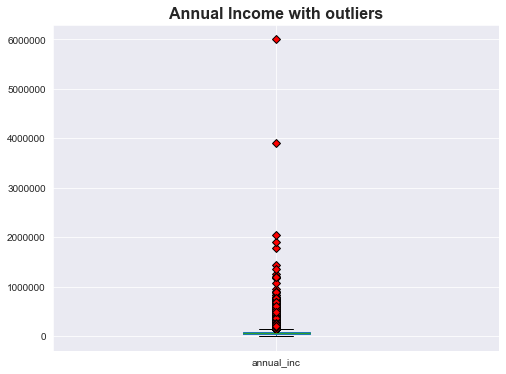

In [116]:
plt.figure(figsize=[8, 6])

green_diamond = dict(markerfacecolor='r', marker='D')
dataset.annual_inc.plot.box(vert=True, flierprops=green_diamond)
plt.title('Annual Income with outliers', fontsize=16, fontweight="bold")

plt.show()

## Data Analysis
### Correlation - Univariate and Bivaraite analysis with loan status

#### Heatmap(left half only) with correlation matrix

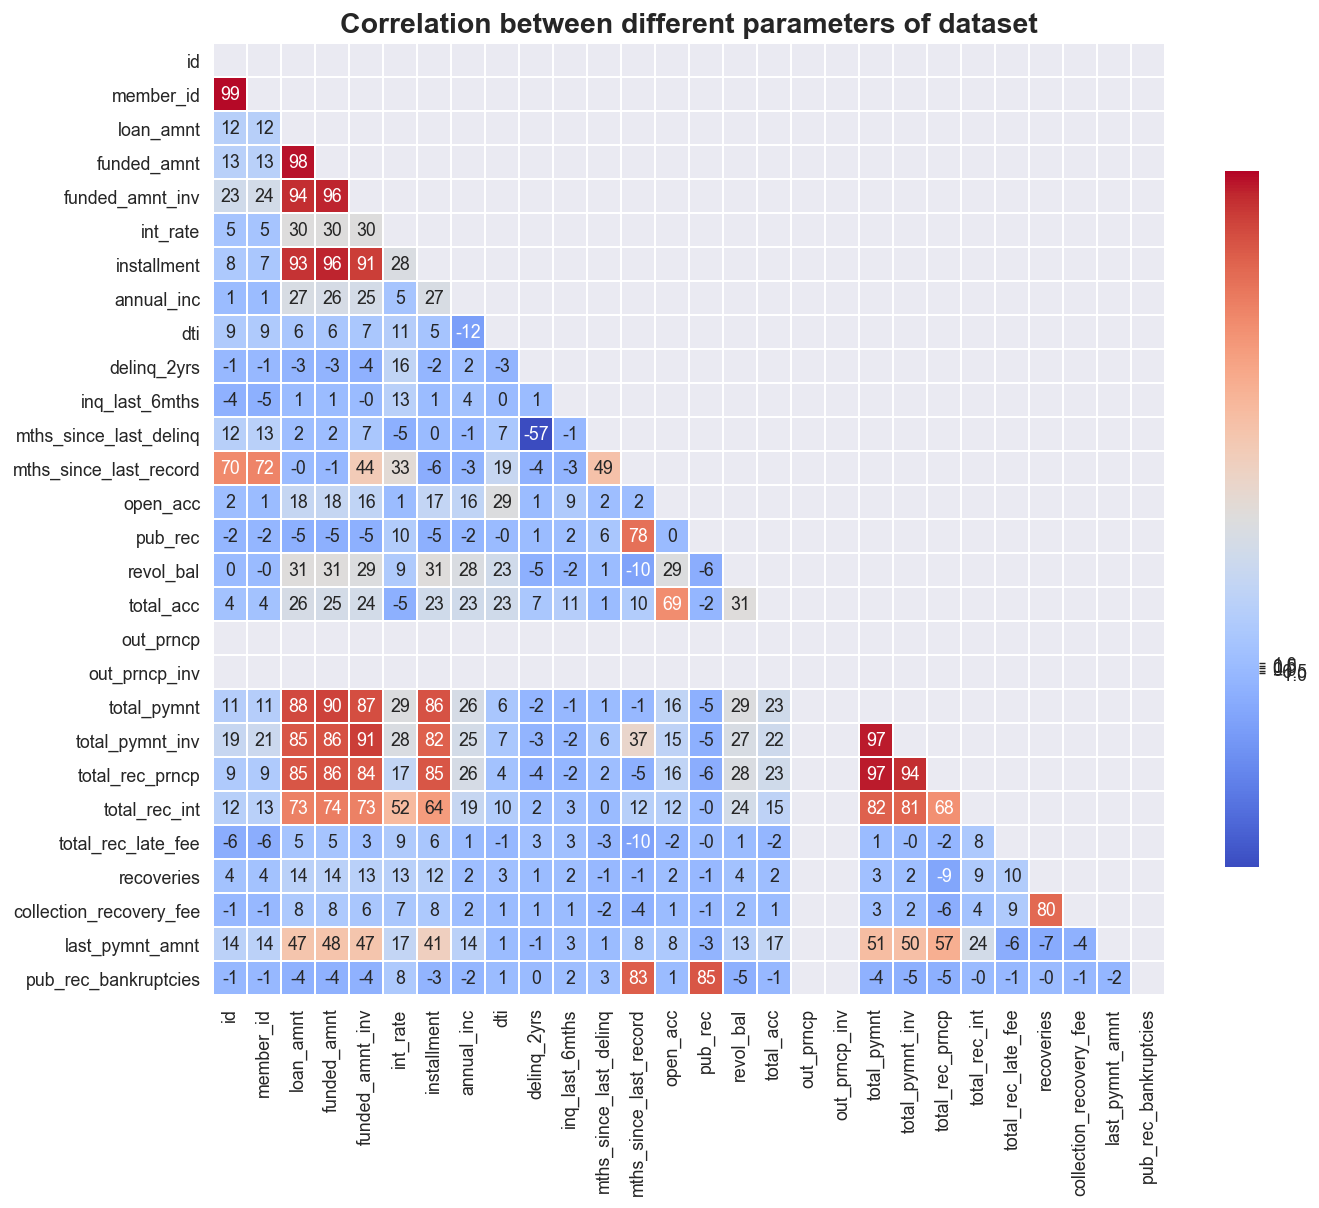

In [117]:
f, ax = plt.subplots(figsize=(12, 18), dpi=128)
corr_matrix = round(dataset.corr() * 100, 0)

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

heatmap = sns.heatmap(corr_matrix,
                      mask=mask,
                      square=True,
                      linewidths=.5,
                      cmap='coolwarm',
                      cbar_kws={
                          'shrink': .4,
                          'ticks': [-1, -.5, 0, 0.5, 1]
                      },
                      vmin=-40,
                      vmax=100,
                      annot=True,
                      annot_kws={'size': 10})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation=0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.title('Correlation between different parameters of dataset',
          fontsize=16,
          fontweight="bold")
plt.show()

#### 1. Loan Amount and Income


#####  Dealing with Income outliers - DEMO
**Taking a threshold of 92% is found to be cleaning the outliers, however that just a trial and error value, and might change with the dataset**

In [118]:
QuantilePercent = 0.92

In [119]:
dataset.annual_inc.quantile(QuantilePercent)

122000.0

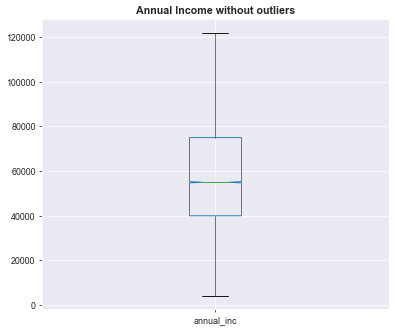

In [120]:
plt.figure(figsize=[7, 6], dpi = 64)
green_diamond = dict(markerfacecolor='r', marker='D')
dataset[dataset.annual_inc <= dataset.annual_inc.quantile(
    QuantilePercent)].annual_inc.plot.box(vert=True,
                                          notch=True,
                                          flierprops=green_diamond)
plt.title('Annual Income without outliers', fontweight="bold")
plt.show()

As we can see, that 92% data is within 122000.0, thus deleting can be solution which  can reduce bias.

In [121]:
dataset_mod = dataset[dataset.annual_inc <= dataset.annual_inc.quantile(QuantilePercent)]

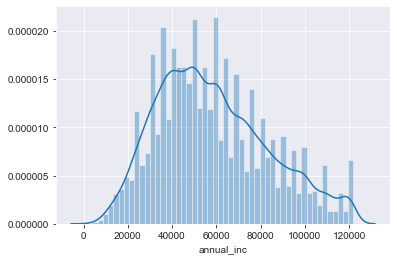

In [122]:
sns.distplot(dataset_mod.annual_inc, hist=True)
plt.show()

In [123]:
(dataset_mod.annual_inc.mean() - dataset_mod.annual_inc.median()) / (
    dataset_mod.annual_inc.max() - dataset_mod.annual_inc.min())

0.030175349576867905

As the ratio is just 3% thus both mean and median are quite close to each other. Thus we can say, that annual income now is almost normally distributed

#### NOTE
**However, for this assignment puposes we are not going to delete the rows exceeding 92% threshold, but take median of the distribution for analysis**

In [124]:
dataset.annual_inc.median()

58868.0

In [125]:
dataset.pivot_table(values=['loan_amnt', 'annual_inc'],
                    index='loan_status',
                    aggfunc=np.median)

,annual_inc,loan_amnt
loan_status,,
Charged Off,53000.0,10000
Fully Paid,60000.0,9600


#### Findings 1
    1. People who have defaulted have median income around 53000.
    
    2. People who have fully paid have median income around 60000.
    
    3. The normalized median is 58868.

#### 2. Loan and term


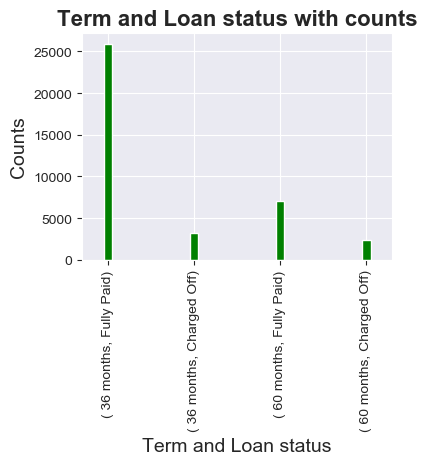

In [126]:
plt.figure(figsize=[4, 3], dpi=100)

dataset_grouped = dataset.groupby('term')
data = dataset_grouped.loan_status.value_counts()
data.plot.bar(color='g', width=0.1)
plt.xlabel('Term and Loan status', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Term and Loan status with counts', fontsize=16, fontweight="bold")
plt.show()

<Figure size 1280x768 with 0 Axes>

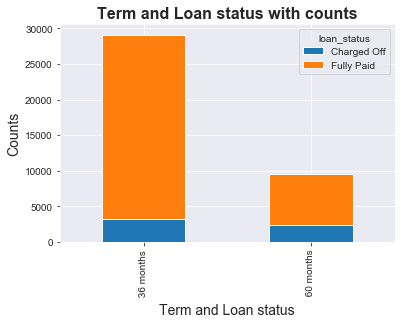

In [127]:
plt.figure(figsize=[10, 6], dpi=128)
dataset_grouped.loan_status.value_counts().unstack().plot.bar(stacked=True,
                                                              grid=True)
plt.xlabel('Term and Loan status', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Term and Loan status with counts', fontsize=16, fontweight="bold")
plt.show()

In [128]:
term_loan_status = dataset_grouped.loan_status.value_counts().sort_values(
    ascending=False)

In [129]:
print('Keys -> {}'.format(term_loan_status.keys()))
print('\n Values -> {}'.format(term_loan_status.values))

Keys -> MultiIndex([(' 36 months',  'Fully Paid'),
            (' 60 months',  'Fully Paid'),
            (' 36 months', 'Charged Off'),
            (' 60 months', 'Charged Off')],
           names=['term', 'loan_status'])

 Values -> [25869  7081  3227  2400]


In [130]:
print('Default % of people for 3 years loan = {} %'.format(
    round(term_loan_status[' 36 months', 'Charged Off'] /
          dataset[dataset.term == ' 36 months'].shape[0] * 100), 4))

Default % of people for 3 years loan = 11.0 %


In [131]:
print('Default % of people for 5 years loan = {} %'.format(
    round(term_loan_status[' 60 months', 'Charged Off'] /
          dataset[dataset.term == ' 60 months'].shape[0] * 100), 4))

Default % of people for 5 years loan = 25.0 %


#### Findings 2
    Default % of people for 5 years loan = 25 %

    Default % of people for 3 years loan = 11 %

#### 3. Home-ownership and loan status

<Figure size 1280x1920 with 0 Axes>

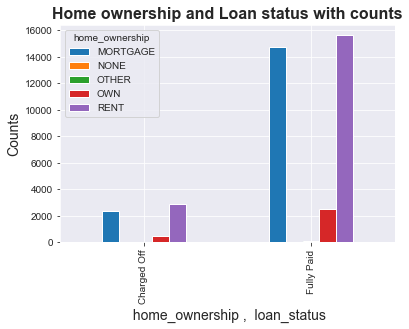

In [132]:
plt.figure(figsize=[10, 15], dpi=128)

data2 = dataset.groupby('loan_status').home_ownership.value_counts()
data2.unstack().plot.bar(grid=True, stacked=False)
plt.xlabel(' home_ownership ,  loan_status', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Home ownership and Loan status with counts', fontsize=16, fontweight="bold")

plt.show()

#### Findings 3
    
    1. Customers with rent home ownership have high probability of  defaulting.
    
    2. Customers with mortgage home ownership have both lesser probability of defaulting than rent.
    
    3. Customers with own home ownership have high probability of full payment and low 
    probability of defaulting.


#### 4. Installment, loan amount , interest rates and loan status

In [133]:
rates_c = dataset[dataset.loan_status == 'Charged Off'].int_rate.mode()

In [134]:
len(rates_c)

2

In [135]:
dataset[(dataset.int_rate == rates_c[0]) |
        (dataset.int_rate == rates_c[1])].term.value_counts()

 36 months    957
 60 months    582
Name: term, dtype: int64

In [136]:
dataset[dataset.loan_status == 'Fully Paid'].int_rate.mode()

0    10.99
dtype: float64

In [137]:
dataset.pivot_table(values=['installment', 'loan_amnt', 'int_rate'],
                    index='loan_status',
                    aggfunc=np.mean)

,installment,int_rate,loan_amnt
loan_status,,,
Charged Off,336.175006,13.820432,12104.385108
Fully Paid,320.125232,11.609761,10866.455994


#### Findings 4
    1. Most Customers who have defaulted had higher interest rate from 11.49 to 13.49 %.
    
    2. Most Customers who have fully paid had lower interest rate of 10.99 %.
    
    3. Customers who have defaulted have taken a mean value loan > 12000 and having 
       a slightly higher installments.

#### 5. Purpose and loan status

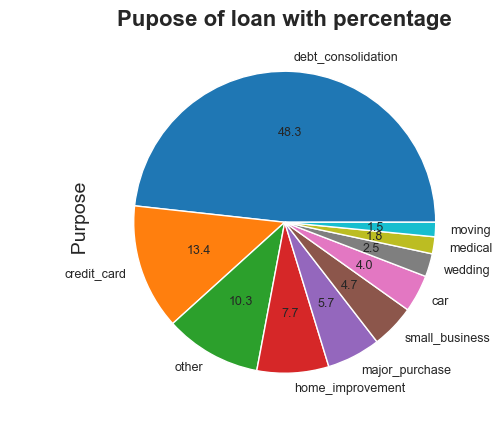

In [138]:
plt.figure(figsize=[6, 5], dpi=100)
dataset["purpose"].value_counts()[:10].plot.pie(autopct='%.1f', fontsize=9)
plt.ylabel('\n\n\n  Purpose', fontsize=14)
plt.title('Pupose of loan with percentage', fontsize=16, fontweight="bold")
plt.show()

<Figure size 1280x1280 with 0 Axes>

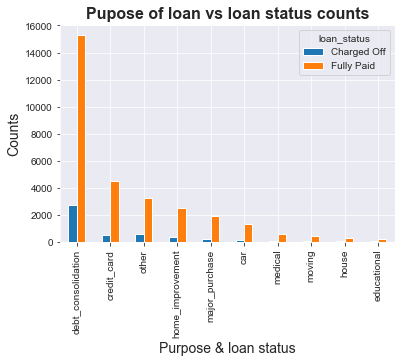

In [139]:
plt.figure(figsize=(10, 10), dpi = 128)
dataset.groupby('purpose').loan_status.value_counts()[:20].sort_values(
    ascending=False).unstack().plot.bar(stacked=False, grid=True)
plt.xlabel('Purpose & loan status', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Pupose of loan vs loan status counts',
          fontsize=16,
          fontweight="bold")
plt.show()

In [140]:
dataset[dataset.purpose == 'debt_consolidation'].pivot_table(
    values=['annual_inc', 'loan_amnt'], index='loan_status', aggfunc=np.mean)

,annual_inc,loan_amnt
loan_status,,
Charged Off,61665.686657,13517.925551
Fully Paid,68058.238596,12319.847266


#### Findings 5
    1. Debt consolidation is the main purose of loan, followed by credit card and other purposes
    2. Annual income of people defaulted is lowest among all whose purpose was 
    debt consolidation an have taken higher loan compare to that of fully paid customers

#### 6. Employment length and loan status

In [141]:
dataset.groupby('emp_length').loan_status.value_counts().sort_values(
    ascending=False).unstack()

loan_status,Charged Off,Fully Paid
emp_length,,
0,639,3869
1,456,2713
10,1331,7157
2,567,3724
3,555,3457
4,462,2880
5,458,2736
6,307,1861
7,263,1448


<Figure size 1280x1280 with 0 Axes>

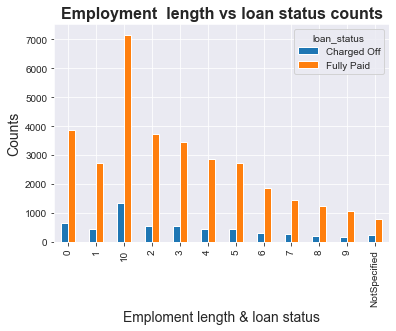

In [142]:
plt.figure(figsize=[10, 10], dpi = 128)
dataset.groupby('emp_length').loan_status.value_counts().sort_values(
    ascending=False).unstack().plot.bar(stacked=False, grid=True)
plt.xlabel('Emploment length & loan status', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Employment  length vs loan status counts',
          fontsize=16,
          fontweight="bold")
plt.show()

#### Findings 6
    1. Customers with 10 years of employment or more have higher chances of fully paying and defaulting.
    2. Customers with < 4 years of employment or more have higher chances of defaulting than more years of experienced guys.

#### 7. Location and loan status

In [143]:
dataset.addr_state.nunique()

50

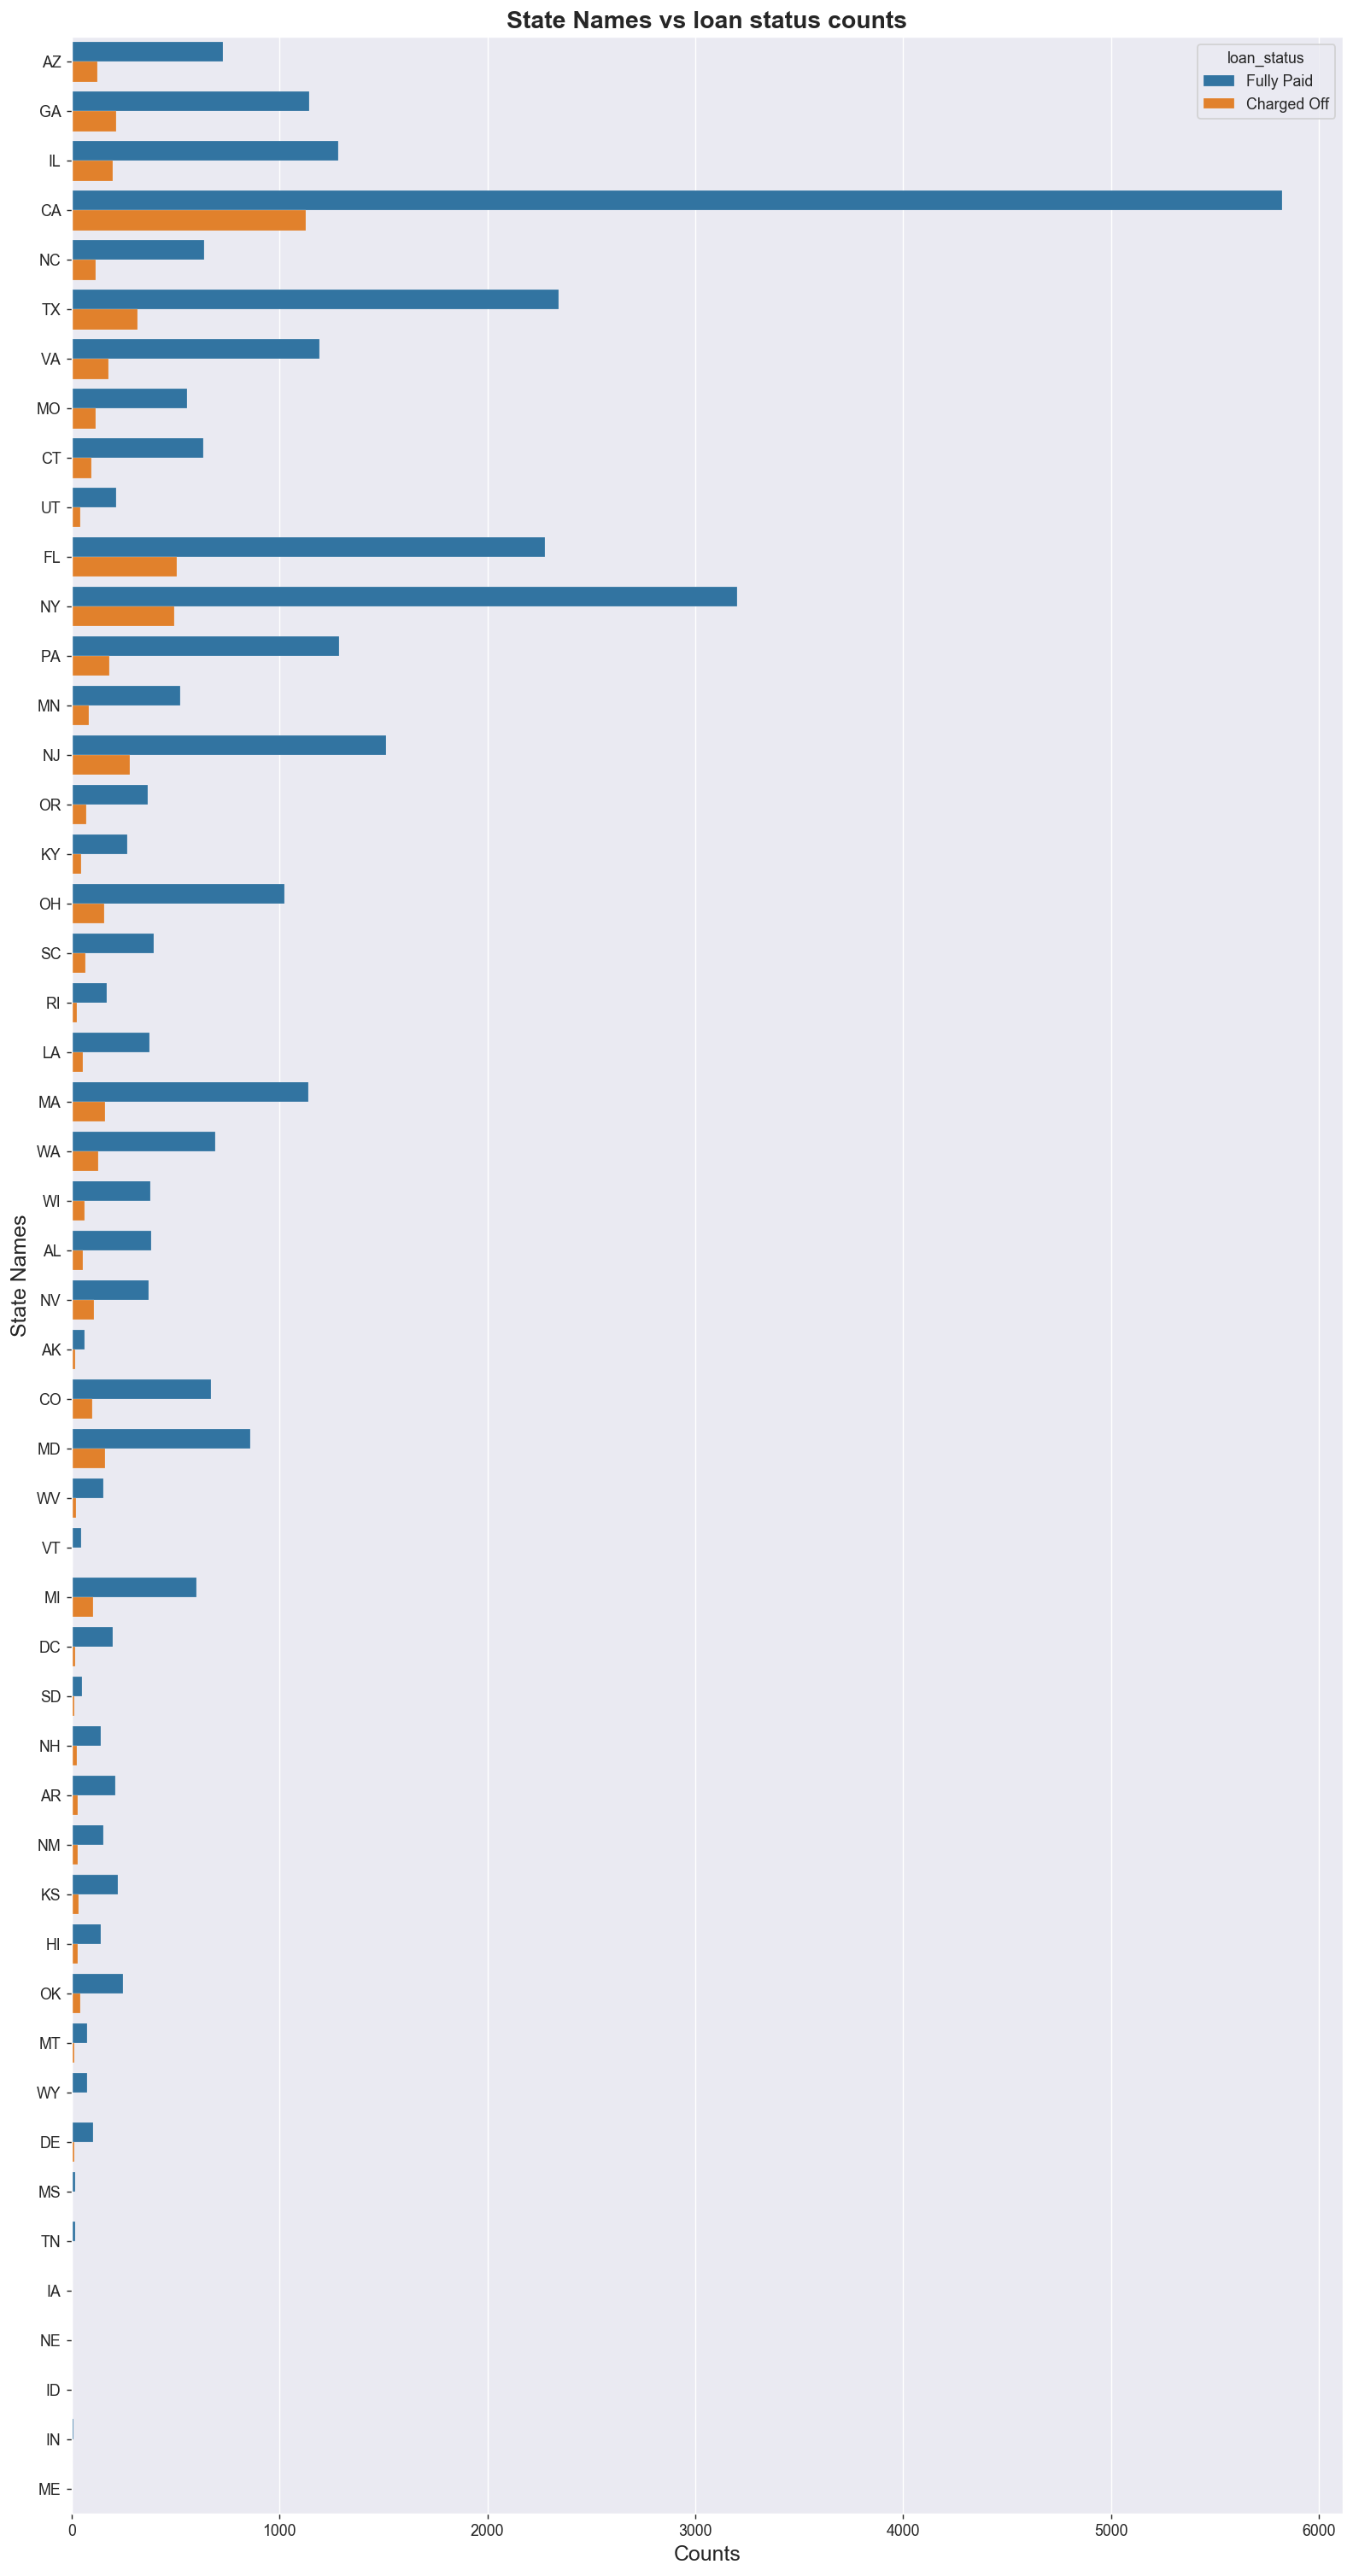

In [144]:
plt.figure(figsize=(15, 30), dpi = 128)
sns.countplot(y='addr_state', hue='loan_status', data=dataset, linewidth = 0.1)
plt.ylabel("State Names", fontsize=14)
plt.xlabel("Counts", fontsize=14)
plt.title("State Names vs loan status counts", fontsize=16, fontweight="bold")
plt.show()

#### Findings 7
    1. Customers mostly belonging to state of California, followed by Florida Texas and New York.
    2. California have high default % since quantity of loans are high. 
    3. Florida and New York are having high default ratio among all the states

#### 8. Grade and sub-grade with loan status

<Figure size 3072x3072 with 0 Axes>

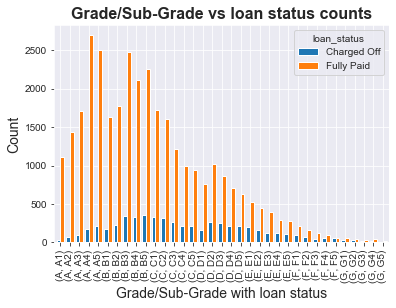

In [145]:
plt.figure(figsize=[12, 12], dpi=256)
dataset.groupby(['grade',
                 'sub_grade']).loan_status.value_counts().unstack().plot.bar(
                     width=0.8, stacked=False)
plt.xticks(fontsize=10)
plt.xlabel("Grade/Sub-Grade with loan status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Grade/Sub-Grade vs loan status counts",
          fontsize=16,
          fontweight="bold")
plt.show()

#### Findings 8
    1. Customers of grade A  and B and subgrade A1-A5, B1-B2 have low default and high 
    payment chances.
    2. Customers of subgrade B3, B4, B5, C1, C2 and C3 have high default  chances.

#### 9. DTI  with loan status

In [146]:
dataset['dti_bins'] =  pd.qcut(dataset.dti,7)

<Figure size 1280x1280 with 0 Axes>

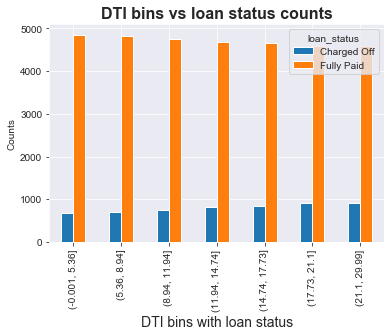

In [147]:
plt.figure(figsize=[10, 10], dpi = 128)
dataset.groupby('dti_bins').loan_status.value_counts().unstack().plot.bar(
    grid=True)

plt.ylabel('Counts')
plt.xlabel("DTI bins with loan status", fontsize=14)
plt.title("DTI bins vs loan status counts", fontsize=16, fontweight="bold")
plt.show()

#### Findings 9
    1. Customers from dti 11.94 to 29.99 have high chances of charging off.

#### 10. Revolving credit balance with loan status

In [148]:
dataset['revol_bal_bins'] = pd.qcut(dataset.revol_bal, 7)

<Figure size 1280x1280 with 0 Axes>

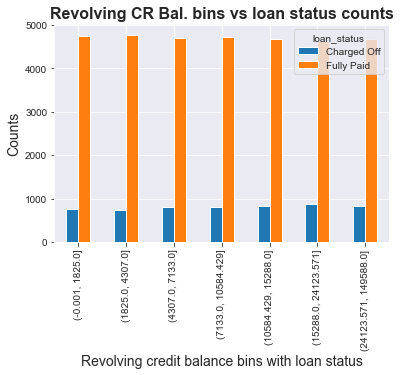

In [149]:
plt.figure(figsize=[10, 10], dpi = 128)
dataset.groupby(
    'revol_bal_bins').loan_status.value_counts().unstack().plot.bar(grid=True)
plt.ylabel('Counts', fontsize=14)
plt.xlabel("Revolving credit balance bins with loan status", fontsize=14)
plt.title("Revolving CR Bal. bins vs loan status counts",
          fontsize=16,
          fontweight="bold")
plt.show()

#### Findings 10
    1. Customers whose total credit revolving balance 4307 to 24123 are more susceptible to charging off.

#### 11. Month LC pulled for credit loan

In [150]:
pd.to_datetime(dataset['last_credit_pull_d'],
               format='%b-%y').dt.month_name().str[:3].value_counts()

May    11255
Apr     4218
Mar     3290
Feb     3072
Dec     2414
Nov     2225
Sep     2111
Jan     2074
Jul     2061
Oct     2061
Aug     2039
Jun     1755
Name: last_credit_pull_d, dtype: int64

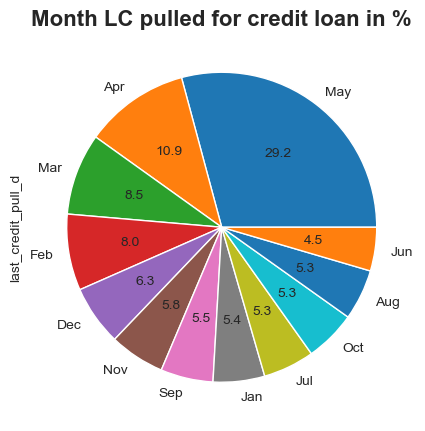

In [151]:
plt.figure(figsize=[5, 6], dpi=100)
pd.to_datetime(dataset['last_credit_pull_d'],
               format='%b-%y').dt.month_name().str[:3].value_counts().plot.pie(
                   autopct='%.1f')
plt.title("Month LC pulled for credit loan in %",
          fontsize=16,
          fontweight="bold")
plt.show()

#### Findings 11
    1. Most number of Credit loan were opened in the month of May

#### 12. Loan Status & Home ownership vs the Number of inquiries

<Figure size 1000x1500 with 0 Axes>

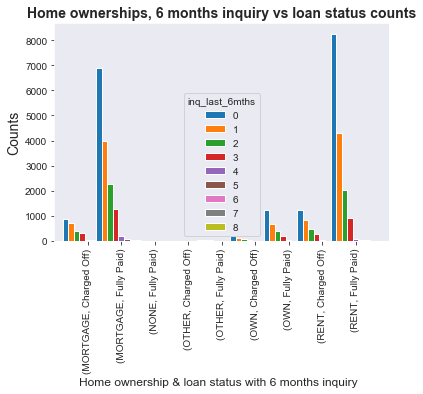

In [152]:
plt.figure(figsize=[10, 15], dpi=100)
dataset.groupby([
    'home_ownership', 'loan_status'
]).inq_last_6mths.value_counts().unstack().plot.bar(grid=False, width = 1.5)
plt.ylabel('Counts', fontsize=14)
plt.xlabel("Home ownership & loan status with 6 months inquiry  ", fontsize=12)
plt.title("Home ownerships, 6 months inquiry vs loan status counts", fontsize=14, fontweight="bold")
plt.show()

#### Findings 12
    1. People who are paying rent and paid their loan fully, are making more number of enquiry for the loan
    2. People who has loan charged off, they are not making many new enquiry

#### 13 Credit line(Top 20) 

In [153]:
pd.to_datetime(dataset['earliest_cr_line'],format='%b-%y').dt.year.value_counts()[:20].keys().sort_values()

Int64Index([1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
            1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007],
           dtype='int64')

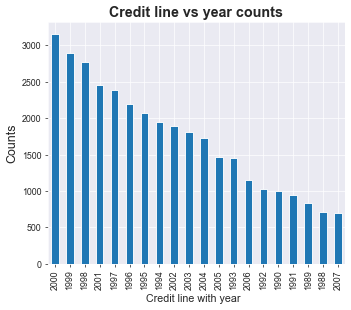

In [154]:
plt.figure(figsize=[6,5], dpi = 64)
pd.to_datetime(dataset['earliest_cr_line'],format='%b-%y').dt.year.value_counts()[:20].plot.bar()
plt.ylabel('Counts', fontsize=14)
plt.xlabel("Credit line with year  ", fontsize=12)
plt.title("Credit line vs year counts", fontsize=16, fontweight="bold")
plt.show()

#### Findings 13
    1. People have taken loans increasingly from 1988 to 2000.
    2. Economic recession is visible in 2007 with least loans being approved

#### 14 Open account

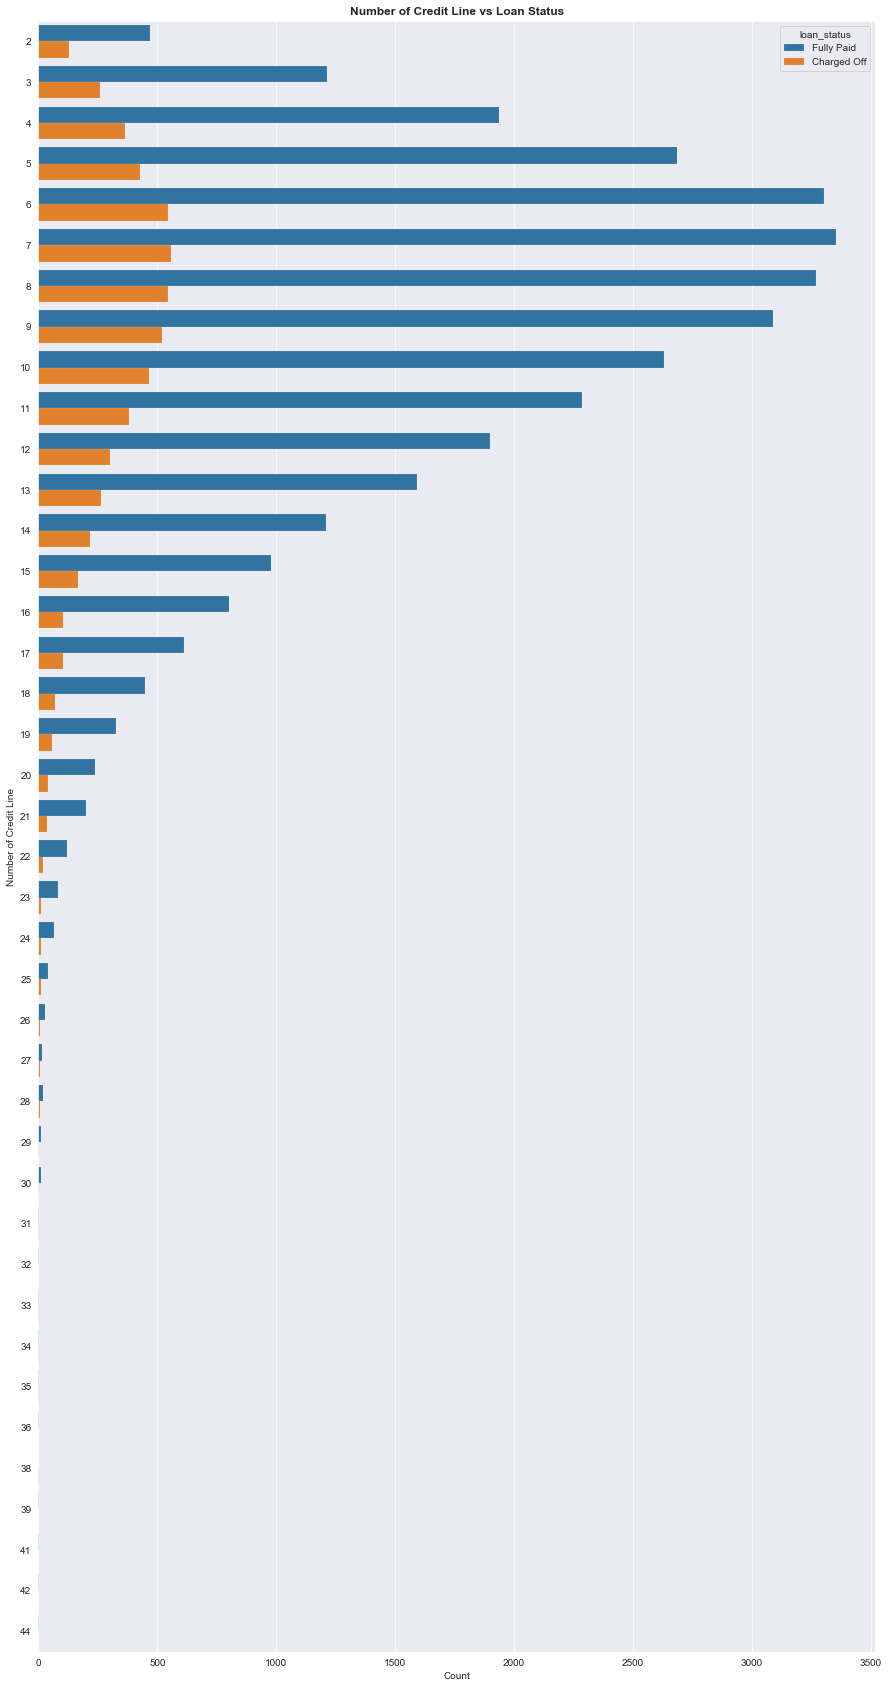

In [155]:
plt.figure(figsize=(15,30))
sns.set_style(style="darkgrid")
sns.countplot(y='open_acc',hue='loan_status',data=dataset, linewidth =0.1)
plt.ylabel("Number of Credit Line")
plt.xlabel("Count")
plt.title("Number of Credit Line vs Loan Status", fontweight="bold")
          
plt.show()

#### Findings 14
    1. Most people have around 5-9 open credit lines in the credit file.
    2. Propotionally, theres is high charge off count in the same, open credit line 
    number. 